# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data=pd.merge(study_results,mouse_metadata, on="Mouse ID",how="left")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count=combined_mouse_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate__mice=combined_mouse_data[combined_mouse_data.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicate__mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
d_mouse_id=combined_mouse_data[(combined_mouse_data["Mouse ID"]== "g989")]
#d_mouse_id_df=pd.DataFrame(d_mouse_id)
#d_mouse_id_df
d_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# the next line of code removed all duplicates based on "Mouse ID": 
#clean_df=combined_mouse_data.drop_duplicates(subset="Mouse ID")
#index_def=clean_df[clean_df['Mouse ID']=='g989'].index
#clean_df2=clean_df.drop(index_def)
#clean_df2.reset_index(inplace=False)
clean_df=combined_mouse_data[combined_mouse_data["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Groupby_sum=clean_df.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Mean_TVol=Groupby_sum["Tumor Volume (mm3)"].mean()
Median_TVol=Groupby_sum["Tumor Volume (mm3)"].median()
Variance_TVol=Groupby_sum["Tumor Volume (mm3)"].var()
Std_Dev_TVol=Groupby_sum["Tumor Volume (mm3)"].std()
SEM_TVol=Groupby_sum["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
Summary_Stx=pd.DataFrame({'Mean Tumor Volume':Mean_TVol,'Median Tumor Volume':Median_TVol,'Tumor Volume Variance':Variance_TVol,'Tumor Volume Std. Deviation':Std_Dev_TVol,'Tumor Volume SEM':SEM_TVol})
Summary_Stx



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Summary_Stx2=clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line.
Summary_Stx2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

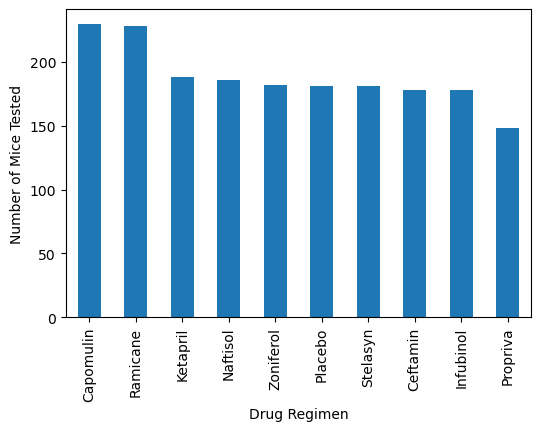

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#bar_df=clean_df.groupby(['Drug Regimen'])['Mouse ID'].count().reset_index(name="Count of Mouse ID")
mice_tested=clean_df.groupby("Drug Regimen")
count_mice=mice_tested["Drug Regimen"].count().sort_values(ascending=False)

bar_chart=count_mice.plot(kind='bar',figsize=(6,4))
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Mice Tested")
#count_mice
plt.show()

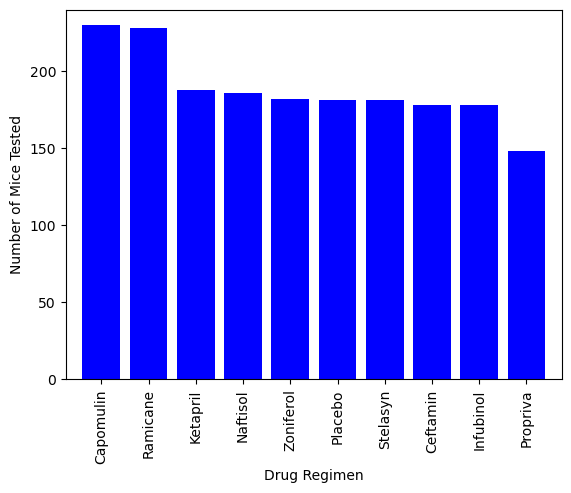

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

Drugs=['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']
mice_count=[230,228,188,186,182,181,181,178,178,148]
x_axis=np.arange(len(mice_count))
#Create plot based on above data and ticks for bar chart's x axis
plt.bar(x_axis, mice_count, color='b', align='center')
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, Drugs, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(mice_count)+10)
#plt.title()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

Sex
Male      958
Female    922
Name: Sex, dtype: int64

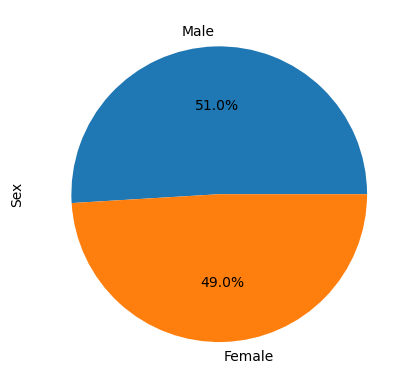

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#gender_mice=clean_df.groupby(["Sex"])["Mouse ID"].count()
#pie_chart=gender_mice.plot.pie(label="",autopct="%1.1f%%")
gender_mice=clean_df.groupby("Sex")
gender_count=gender_mice["Sex"].count().sort_values(ascending=False)
pie_chart=gender_count.plot(kind='pie', autopct='%1.1f%%')
gender_count
#plt.show()

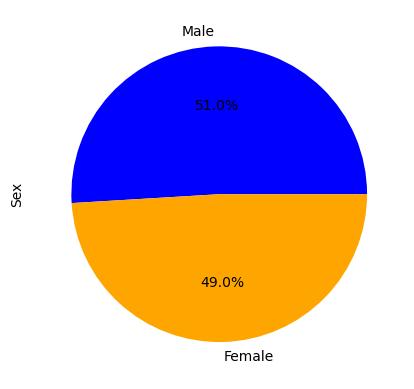

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex=["Male","Female"]
members=[958,922]
colors=['blue','orange',]
#plt.title("Mice Sex")
plt.pie(members,labels=Sex,colors=colors, autopct='%1.1f%%')
plt.ylabel("Sex")
#plt.gca().set_facecolor('grey')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin=clean_df.loc[clean_df['Drug Regimen']=='Capomulin',:]
ramicane=clean_df.loc[clean_df['Drug Regimen']=='Ramicane',:]
infubinol=clean_df.loc[clean_df['Drug Regimen']=='Infubinol',:]
ceftamin=clean_df.loc[clean_df['Drug Regimen']=='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
max_capo=capomulin.groupby('Mouse ID').max()['Timepoint']
max_rami=ramicane.groupby('Mouse ID').max()['Timepoint']
max_infu=infubinol.groupby('Mouse ID').max()['Timepoint']
max_cefta=ceftamin.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_capo_df=pd.DataFrame(max_capo)
max_rami_df=pd.DataFrame(max_rami)
max_infu_df=pd.DataFrame(max_infu)
max_cefta_df=pd.DataFrame(max_cefta)

merge_capo=pd.merge(max_capo_df,clean_df, how='left', on=('Mouse ID', 'Timepoint'))
merge_rami=pd.merge(max_rami_df,clean_df, how='left', on=('Mouse ID', 'Timepoint'))
merge_infu=pd.merge(max_infu_df,clean_df, how='left', on=('Mouse ID', 'Timepoint'))
merge_cefta=pd.merge(max_cefta_df,clean_df, how='left', on=('Mouse ID', 'Timepoint'))

Treatment_Reg=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramicane")|(clean_df["Drug Regimen"]=="Infubinol")|(clean_df["Drug Regimen"]=="Ceftamin")]
Treatment_Reg1= Treatment_Reg.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
Treatment_Reg2=pd.merge(Treatment_Reg1,clean_df, how='left', on=('Mouse ID', 'Timepoint'))



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
T_vol=0
timepoint=clean_df.groupby(['Drug Regimen', 'Mouse ID']).agg(T_vol = ('Tumor Volume (mm3)', lambda x: x.iloc[-1]))
timepoint= timepoint.stack(level=0).unstack(level=0)

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    quartiles= timepoint[treatment].quantile([.25, .5, .75]).round(2)
    lowerq= quartiles[.25].round(2)
    upperq= quartiles[.75].round(2)
    iqr= round(upperq - lowerq)
    lower_bound= round(lowerq - (1.5 * iqr),2)
    upper_bound= round(upperq - (1.5 * iqr))
    
    if T_vol == 0:
        print(f'The IQR of {treatment} treatment is {iqr}')
        print(f'Values below {lower_bound} could be {treatment} outliers')
        print(f'Values above {upper_bound} could be {treatment} outliers')
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The IQR of Capomulin treatment is 8
Values below 20.38 could be Capomulin outliers
Values above 28 could be Capomulin outliers
The IQR of Ramicane treatment is 9
Values below 18.06 could be Ramicane outliers
Values above 27 could be Ramicane outliers
The IQR of Infubinol treatment is 11
Values below 37.55 could be Infubinol outliers
Values above 49 could be Infubinol outliers
The IQR of Ceftamin treatment is 16
Values below 24.72 could be Ceftamin outliers
Values above 40 could be Ceftamin outliers


In [15]:
capomulin_TV=merge_capo["Tumor Volume (mm3)"]
ramicane_TV=merge_rami["Tumor Volume (mm3)"]
infubinol_TV=merge_infu["Tumor Volume (mm3)"]
ceftamin_TV=merge_cefta["Tumor Volume (mm3)"]


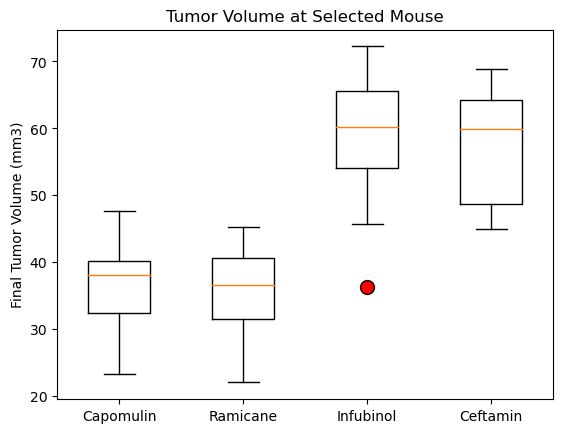

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_to_plot=[capomulin_TV,ramicane_TV,infubinol_TV,ceftamin_TV]
regimen=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

figl, axl = plt.subplots()
axl.set_title("Tumor Volume at Selected Mouse")
axl.set_ylabel("Final Tumor Volume (mm3)")

axl.boxplot(data_to_plot, labels=regimen,flierprops=dict(markerfacecolor='r', markersize=10), widths=0.5, vert=True)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

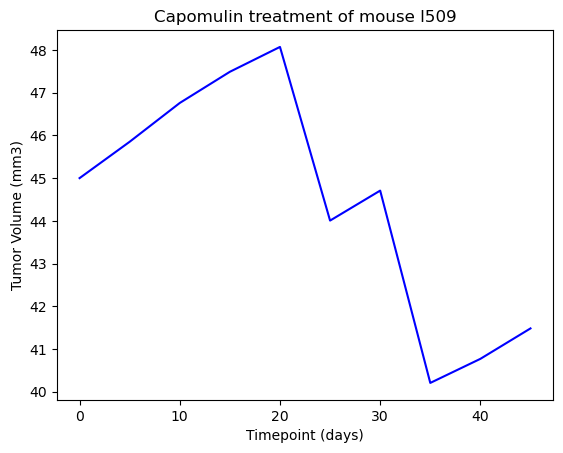

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (I509)
Mouse_I509=capomulin.loc[(capomulin['Mouse ID']== 'l509')]
#count=Mouse_I509['Tumor Volume (mm3)']
#time=Mouse_I509['Timepoint'] "Time point is x axis and Tumor Vol is y axis"
plt.plot(Mouse_I509['Timepoint'], Mouse_I509['Tumor Volume (mm3)'], color= 'blue')
plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

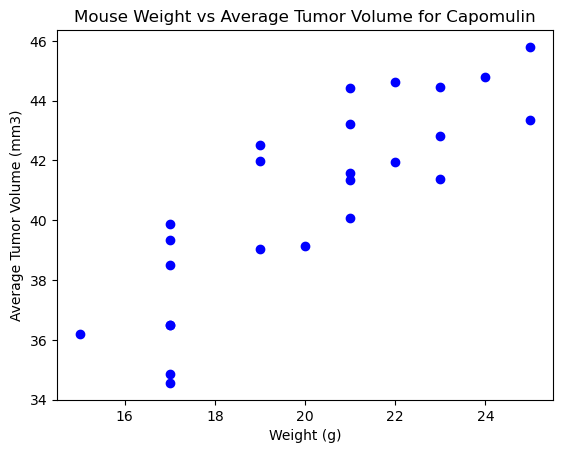

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

figl, axl = plt.subplots()
avg_tum_vol = capomulin.groupby(["Mouse ID"]).mean()

marker_size=15
plt.scatter(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"], color="b")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r-squared is: 0.709


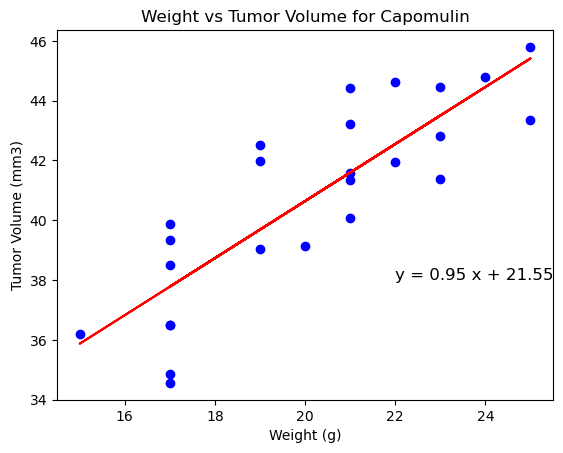

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"])
regression_values = avg_tum_vol["Weight (g)"]* slope + intercept
linear_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_tum_vol["Weight (g)"], avg_tum_vol["Tumor Volume (mm3)"], color="b")
plt.plot(avg_tum_vol["Weight (g)"], regression_values, color="r")
plt.annotate(linear_eq,(22,38), fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()